# **Projeto em Análise de Dados**

### **Importando as bibliotecas necessárias para o projeto**

In [780]:
import os #percorrer (ler) arquivos, dowload e upload de arquivos
import os.path #percorrer (ler) arquivos, dowload e upload de arquivos
import pandas as pd #utilizar os DataFrames e facilidade de trabalho com muitos dados
from datetime import datetime #tratamento de dados para datas
from datetime import timedelta #tratamento de dados para datas
import matplotlib.pyplot as plt #plot dos gráficos
import statsmodels.api as sm #regressão linear
import numpy as np #import desta biblioteca no projeto é para utilização do stasmodel para regressão linear
from sklearn.model_selection import train_test_split #biblioteca para dividir os dados em treino e teste
from sklearn.metrics import mean_squared_error, r2_score #biblioteca para pegar algumas informações e metadados da regressão linear

### **1) Tratamento de Dados - ETL e Criação de Camadas para Backup**

#### A parte **"E" (extract)** do ETL já foi feita de antemão, uma vez que os dados do drive com as planilhas mockadas foram baixados e transferidos para este diretório. Os próximos passos são: Fazer a leitura dos dados e **transformação** dos mesmos, para posteriormente fazermos o **LOAD** em um DataFrame do Pandas e em arquivos .csv.

##### A Etapa Load compreende também em guardar os dados em .csv em camadas - Usar um conceito aqui de Data Engineering que é salvar os dados em 3 camadas (bronze, silver e gold).
##### A diferença entre as camadas está no tratamento dos dados e nas colunas.
##### Quanto mais perto da etapa, mais a camada está apta para ser usada na análise e visualização dos dados (DataViz) - Só a partir da etapa Gold é que podemos iniciar a análise em si dos dados.
##### Fazemos esse tipo de Backup geralmente em banco de dados via Schema, onde pode acontecer de existir algum erro na etapa seguinte de tratamento e assim podemos recuperar os dados mais "brutos" nas etapas anteriores.
##### Exemplo: Se der algum erro na camada Gold com os dados, podemos obter os dados novamente acessando a camada Silver... E assim por diante.

In [781]:
# Inicializo o DataFrame principal em Pandas:

df = pd.DataFrame()
dfs = [] # Vetor fora do Pandas para receber appends


caminho = 'Tabelas/'
lista_arquivos = os.listdir(caminho)

# 'For' para varrer toda a pasta de planilhas mockadas:
for arquivo in lista_arquivos:
    df_aux = pd.read_csv(caminho+str(arquivo))
    dfs.append(df_aux)

df = pd.concat(dfs, ignore_index=True) # Concatenação de dataframes

df.to_csv('backup/camada_bronze.csv') # transformar Arquivo em .csv para camada Bronze (conceito de Data Engeneering) - Para usar de Backup

df

,ano,uf,genero,mes,numero
0,2019,Rondônia,Masculino,Janeiro,0
1,2019,Rondônia,Masculino,Fevereiro,4
2,2019,Rondônia,Masculino,Março,1
3,2019,Rondônia,Masculino,Abril,0
4,2019,Rondônia,Masculino,Maio,0
...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12
4532,2021,Distrito Federal,Feminino,Setembro,13
4533,2021,Distrito Federal,Feminino,Outubro,15
4534,2021,Distrito Federal,Feminino,Novembro,20


#### Agora que temos um DataFrame único, podemos fazer o tratamento de dados, pois alguns campos (colunas) ainda estão com o type de 'object'

In [782]:
df.dtypes

ano        int64
uf        object
genero    object
mes       object
numero     int64
dtype: object

#### Não é pertinente deixar duas colunas de data (como por exemplo, ano e mês) separadas, sendo assim podemos juntá-las em uma única e transformar os dados em Date Time

In [783]:
#Criação de um dicionário para mapear os meses e transformá-los em números.

dicionario_mes = {
    'Janeiro': '01',
    'Fevereiro': '02',
    'Março': '03',
    'Abril': '04',
    'Maio': '05',
    'Junho': '06',
    'Julho': '07',
    'Agosto': '08',
    'Setembro': '09',
    'Outubro': '10',
    'Novembro': '11',
    'Dezembro': '12'
}

In [784]:
#Criação da coluna de numero_mes que corresponde ao número do respectvo mês do dicionário acima.
#Utilizei o método map que maepeia os valores do dicionário
df['numero_mes'] = df['mes'].map(dicionario_mes)
df

,ano,uf,genero,mes,numero,numero_mes
0,2019,Rondônia,Masculino,Janeiro,0,01
1,2019,Rondônia,Masculino,Fevereiro,4,02
2,2019,Rondônia,Masculino,Março,1,03
3,2019,Rondônia,Masculino,Abril,0,04
4,2019,Rondônia,Masculino,Maio,0,05
...,...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12,08
4532,2021,Distrito Federal,Feminino,Setembro,13,09
4533,2021,Distrito Federal,Feminino,Outubro,15,10
4534,2021,Distrito Federal,Feminino,Novembro,20,11


In [785]:
df.dtypes

ano            int64
uf            object
genero        object
mes           object
numero         int64
numero_mes    object
dtype: object

In [786]:
df['ano'] = df['ano'].astype(str) # Transformar o Ano em string, pois ainda está em int
df['numero_mes'] = df['numero_mes'].astype(str) # Transformar o Ano em string, pois ainda está em object
df['data'] = pd.to_datetime(df['ano'] + '-' + df['numero_mes'] + '-01') # Como o dia do mês não importa na análise, podemos omitir esse campo
# Por default, as datas ficarão no formato aaaa-mm-dd, o campo de dia '-dd' ficará sempre '01'

In [787]:
# Verificar se há valores nulos no DataFrame e 'Dropá-los', pois se há algum valor nulo, não devemos considerá-los na análise:
df = df.dropna()
df


,ano,uf,genero,mes,numero,numero_mes,data
0,2019,Rondônia,Masculino,Janeiro,0,01,2019-01-01
1,2019,Rondônia,Masculino,Fevereiro,4,02,2019-02-01
2,2019,Rondônia,Masculino,Março,1,03,2019-03-01
3,2019,Rondônia,Masculino,Abril,0,04,2019-04-01
4,2019,Rondônia,Masculino,Maio,0,05,2019-05-01
...,...,...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12,08,2021-08-01
4532,2021,Distrito Federal,Feminino,Setembro,13,09,2021-09-01
4533,2021,Distrito Federal,Feminino,Outubro,15,10,2021-10-01
4534,2021,Distrito Federal,Feminino,Novembro,20,11,2021-11-01


In [788]:
# Verificar se há valores Duplicados no DataFrame e 'Dropá-los', pois se há algum valor duplicado, não devemos considerá-los na análise:
duplicatas_df = df.duplicated()

# Exibir linhas duplicadas
print(df[duplicatas_df])

Empty DataFrame
Columns: [ano, uf, genero, mes, numero, numero_mes, data]
Index: []


In [789]:
# Foi verificado acima que não há valores nulos e nem duplicatas nas linhas, pois o DataFrame continua com a mesma quantidade de linhas que anteriormente
# Portanto podemos seguir pra a etapa Silver de tratamento de Dados. 
df.to_csv('backup/camada_silver.csv') # transformar Arquivo em .csv para camada Silver (conceito de Data Engeneering) - Para usar de Backup - Dados mais tratados em Silver (tipagem correta).
# Além de tipagem correta, temos valores nulos desconsiderados e valores duplicados também (no presente caso não há nenhum tipo desses valores por linha).

#### Agora podemos 'Dropar' as colunas 'numero_mes', 'mes' e 'ano' para fins de performance, mas podemos manter as mesmas colunas caso sejam pertinentes na análise (neste caso irei manter as colunas 'mes' e 'ano'). Manterei desta forma, pois os dados já estão 'Safrados' (conceito em DE de agrupamento de data, por exemplo).

#### Neste caso irei dropar apenas a coluna de 'numero_mes', pois a coluna de data já possui toda a informação pertinente.

In [790]:
#Neste passo farei a parte de estabelecer relações entre Estados e suas respectivas regiões, isso para a camada Gold.
df = df.drop(columns='numero_mes') #Tirar a coluna de numero_mes

#Segue o dicionário que relacona os Estados com suas respectivas Regiões do BR:
uf_regioes = {
    'Acre': 'Norte',
    'Alagoas': 'Nordeste',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Goiás': 'Centro-Oeste',
    'Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Pará': 'Norte',
    'Paraíba': 'Nordeste',
    'Paraná': 'Sul',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio de Janeiro': 'Sudeste',
    'Rio Grande do Norte': 'Nordeste',
    'Rio Grande do Sul': 'Sul',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Santa Catarina': 'Sul',
    'São Paulo': 'Sudeste',
    'Sergipe': 'Nordeste',
    'Tocantins': 'Norte'
}

df['regiao'] = df['uf'].map(uf_regioes) #Mapear as regiões dentro do DataFrame
# Colocar a data númerica (dias corridos):
df['data_numerica'] = (df['data'] - df['data'].min()).dt.days # Variação de dias corridos para ter um "x" de mais fácl entendimento e visbilidade - Para a biblioteca statsmodel
# A biblioteca stasmodel não aceita a data no formato Datetime, por isso é pertinente criar mais esta coluna acima.

df.to_csv('backup/camada_gold.csv') #Criação da Camada Gold (última camada e configuração ideal para a análise de dados)
df

,ano,uf,genero,mes,numero,data,regiao,data_numerica
0,2019,Rondônia,Masculino,Janeiro,0,2019-01-01,Norte,1461
1,2019,Rondônia,Masculino,Fevereiro,4,2019-02-01,Norte,1492
2,2019,Rondônia,Masculino,Março,1,2019-03-01,Norte,1520
3,2019,Rondônia,Masculino,Abril,0,2019-04-01,Norte,1551
4,2019,Rondônia,Masculino,Maio,0,2019-05-01,Norte,1581
...,...,...,...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12,2021-08-01,Centro-Oeste,2404
4532,2021,Distrito Federal,Feminino,Setembro,13,2021-09-01,Centro-Oeste,2435
4533,2021,Distrito Federal,Feminino,Outubro,15,2021-10-01,Centro-Oeste,2465
4534,2021,Distrito Federal,Feminino,Novembro,20,2021-11-01,Centro-Oeste,2496


In [791]:
df.dtypes

ano                      object
uf                       object
genero                   object
mes                      object
numero                    int64
data             datetime64[ns]
regiao                   object
data_numerica             int64
dtype: object

#### Sendo assim, o Tratamento de Dados está concluído!

#### ETL - Feito!

#### Criação de Camadas para Backup (Bronze, Silver e Gold) - Feito!

### **2) Análise dos Dados tratados - Insights Iniciais**

#### Plot inicial: Data x Casamentos Homoafetivos

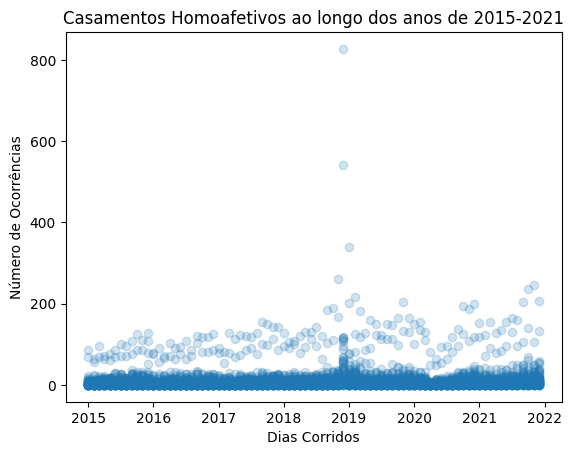

In [792]:
# Verificar um plot inicial de série temporal:
plt.scatter(df['data'], df['numero'], alpha=0.2)
plt.xlabel('Dias Corridos')
plt.ylabel('Número de Ocorrências')
plt.title('Casamentos Homoafetivos ao longo dos anos de 2015-2021')
plt.show()

##### Como os dados da série temporal de Data x Número de Casamentos estão visualmente poluídos, devemos segmentar e 'safrar' os dados para termos uma clareza melhor do problema

#### Histogramas (Captar Metadados):

##### Abaixo seguem os plots de Histogramas e seus respectivos DataFrame de cohorts - Mostro os plots e os dados tabelados para uma possível consulta

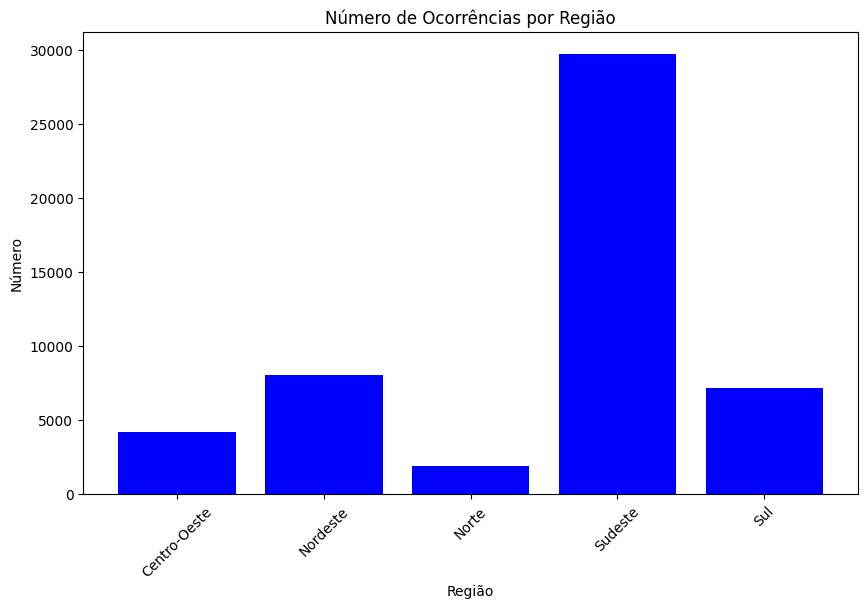

In [793]:
# Agrupar por região, somar os números e resetar o index
df_regiao = df.groupby('regiao')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(10, 6))
plt.bar(df_regiao['regiao'], df_regiao['numero'], color='blue')
plt.xlabel('Região')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Região')
plt.xticks(rotation=45)
plt.show()

In [794]:
df_regiao

,regiao,numero
0,Centro-Oeste,4192
1,Nordeste,8070
2,Norte,1898
3,Sudeste,29714
4,Sul,7192


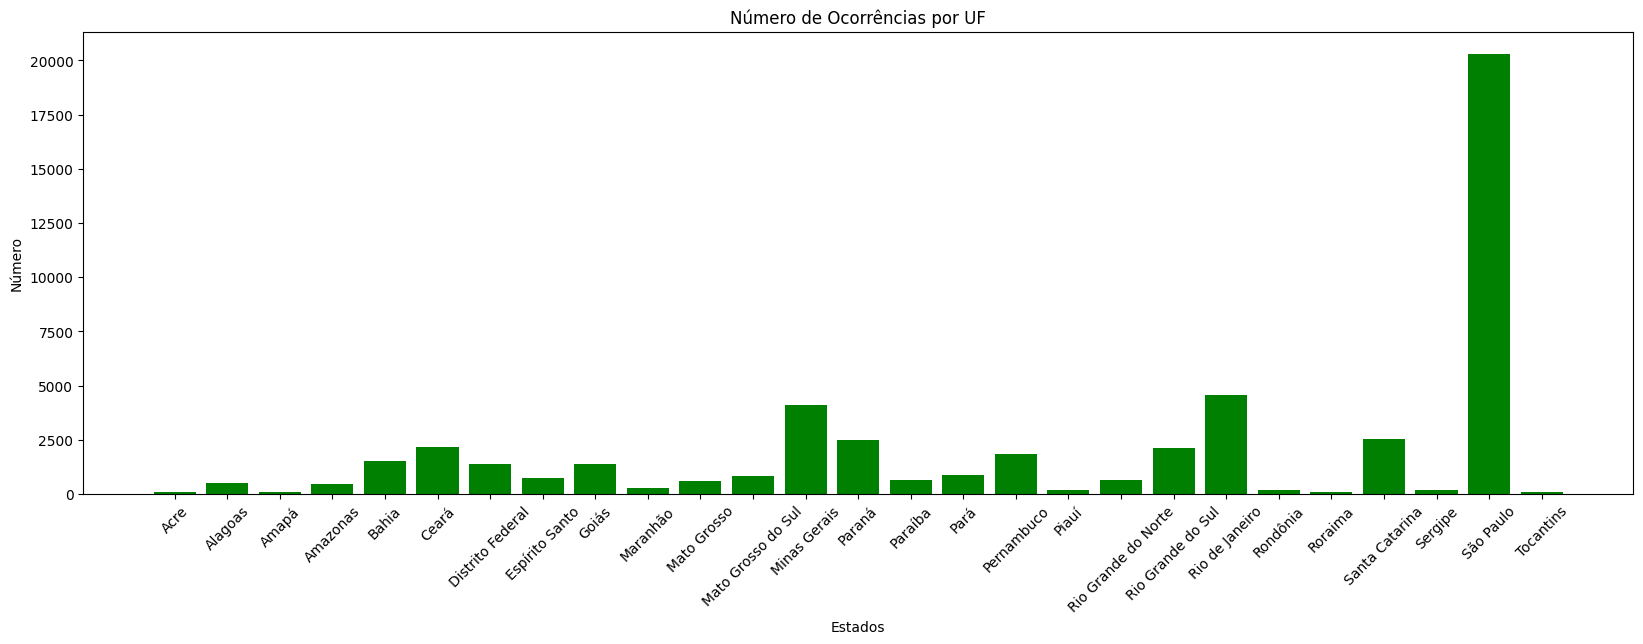

In [795]:
# Agrupar por uf, somar os números e resetar o index
df_uf = df.groupby('uf')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(20, 6)) #Ajuste de 20 x 6 para alongar o gráfico na horizontal
plt.bar(df_uf['uf'], df_uf['numero'], color='green')
plt.xlabel('Estados')
plt.ylabel('Número')
plt.title('Número de Ocorrências por UF')
plt.xticks(rotation=45)
plt.show()

In [796]:
df_uf

,uf,numero
0,Acre,81
1,Alagoas,512
2,Amapá,81
3,Amazonas,454
4,Bahia,1531
5,Ceará,2166
6,Distrito Federal,1378
7,Espírito Santo,758
8,Goiás,1367
9,Maranhão,306


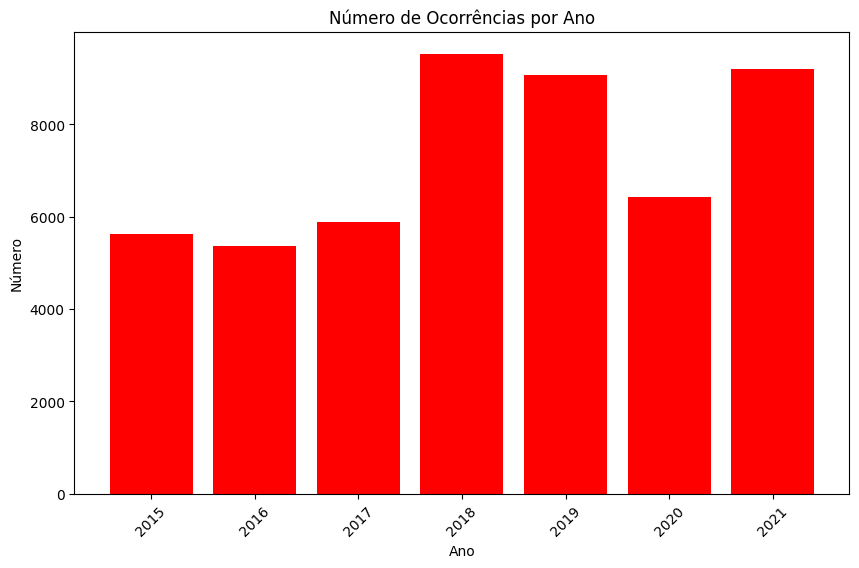

In [797]:
# Agrupar por ano, somar os números e resetar o index
df_ano = df.groupby('ano')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(10, 6))
plt.bar(df_ano['ano'], df_ano['numero'], color='red')
plt.xlabel('Ano')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Ano')
plt.xticks(rotation=45)
plt.show()

In [798]:
df_ano

,ano,numero
0,2015,5614
1,2016,5354
2,2017,5887
3,2018,9520
4,2019,9056
5,2020,6433
6,2021,9202


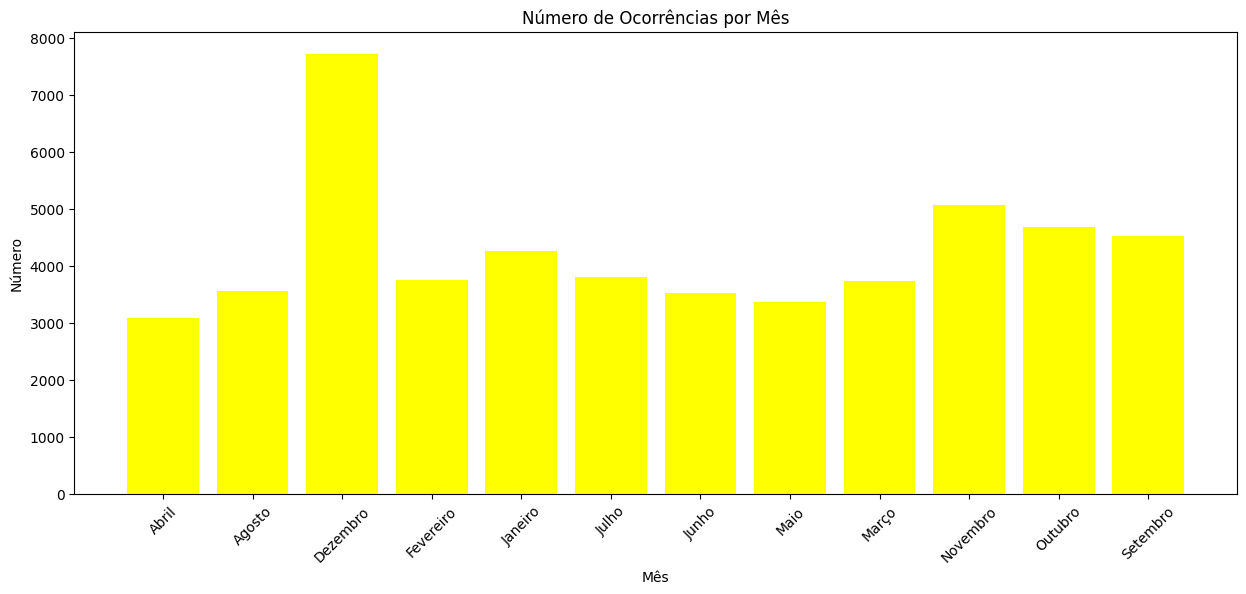

In [799]:
# Agrupar por mês, somar os números e resetar o index
df_mes = df.groupby('mes')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(15, 6))
plt.bar(df_mes['mes'], df_mes['numero'], color='yellow')
plt.xlabel('Mês')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Mês')
plt.xticks(rotation=45)
plt.show()

In [800]:
df_mes

,mes,numero
0,Abril,3077
1,Agosto,3566
2,Dezembro,7716
3,Fevereiro,3753
4,Janeiro,4252
5,Julho,3806
6,Junho,3519
7,Maio,3371
8,Março,3727
9,Novembro,5062


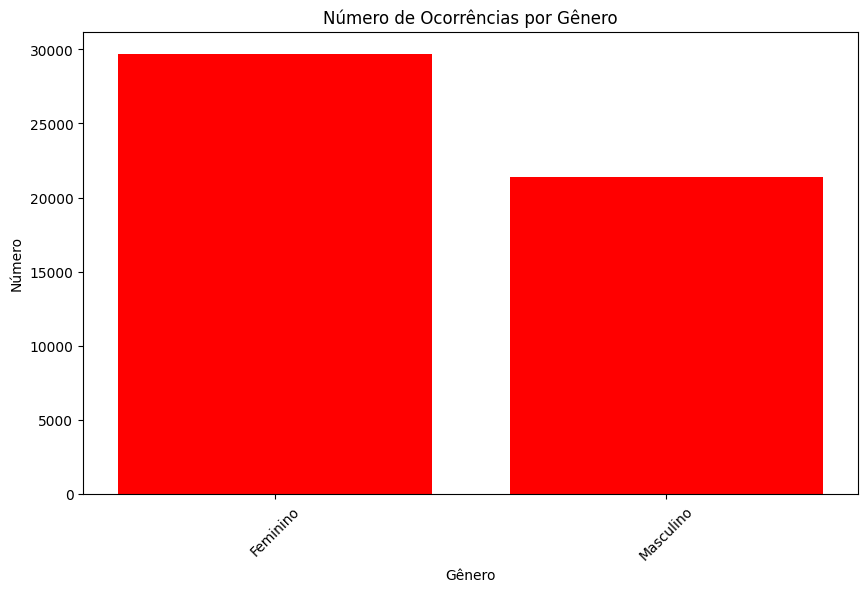

In [801]:
# Agrupar por genero, somar os números e resetar o index
df_gen = df.groupby('genero')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(10, 6))
plt.bar(df_gen['genero'], df_gen['numero'], color='red')
plt.xlabel('Gênero')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Gênero')
plt.xticks(rotation=45)
plt.show()

In [802]:
df_gen

,genero,numero
0,Feminino,29693
1,Masculino,21373


### **3) - Explorando o problema do Cliente com Análise de Dados**

#### *Queremos entender quais insights conseguimos tirar dessa base, e também qual a previsão de casamentos homoafetivos para os próximos 2 anos nos 3 estados com maior número de casamentos no último ano. Seria possível realizar essa análise?*

##### 1. Para isto, devemos fazer os filtros pertinentes e achar os 3 Estados com maior número de casamentos no último ano;
##### 2. Após acharmos os Estados, devemos fazer um tratamento de dados para retirar os outliers;
##### 3. Após retirarmos os outliers, devemos fazer a Regressão Linear em cada Cohort considerado, que neste caso é por Estado;
##### 4. Após a regressão linear, conseguimos a Eq. da Reta para cada Cohort e aplicamos a equação para dados além do range dos dados reais (extrapolar os dados, neste caso para um range de 2 anos que são 2022 e 2023);

##### Filtros pertinentes e achar os 3 Estados com maior número de casamentos no último ano:

In [803]:
df_insight = df[(df['ano'] == '2021')] # Filtra todo df no último ano que é 2021
df_insight = df_insight.groupby('uf')['numero'].sum().reset_index() # Agrupa por Estado (uf)
df_insight = df_insight.sort_values(by='numero', ascending=False) # Ordena de forma decrescente pelo número somado
df_insight

,uf,numero
25,São Paulo,3319
12,Minas Gerais,815
20,Rio de Janeiro,734
13,Paraná,486
23,Santa Catarina,404
10,Mato Grosso,376
5,Ceará,372
16,Pernambuco,359
19,Rio Grande do Sul,344
4,Bahia,303


##### Logo os 3 Estados com o maior número de casamentos do ano de 2021 são: 

##### 1) **São Paulo** 
##### 2) **Minas Gerais**
##### 3) **Rio de Janeiro**

##### Para prever o número de casamentos Homoafetivos nos próximos 2 anos, devemos fazer um cohort dos 3 Estados (uf).

#### **Análise para SP:**

In [804]:
# Aqui irei criar um DataFrame somente para SP e farei os cohorts devidos para a análise:
df_sp = df[df['uf'] == 'São Paulo']
df_sp

,ano,uf,genero,mes,numero,data,regiao,data_numerica
228,2019,São Paulo,Masculino,Janeiro,201,2019-01-01,Sudeste,1461
229,2019,São Paulo,Masculino,Fevereiro,126,2019-02-01,Sudeste,1492
230,2019,São Paulo,Masculino,Março,119,2019-03-01,Sudeste,1520
231,2019,São Paulo,Masculino,Abril,86,2019-04-01,Sudeste,1551
232,2019,São Paulo,Masculino,Maio,90,2019-05-01,Sudeste,1581
...,...,...,...,...,...,...,...,...
4447,2021,São Paulo,Feminino,Agosto,159,2021-08-01,Sudeste,2404
4448,2021,São Paulo,Feminino,Setembro,204,2021-09-01,Sudeste,2435
4449,2021,São Paulo,Feminino,Outubro,236,2021-10-01,Sudeste,2465
4450,2021,São Paulo,Feminino,Novembro,246,2021-11-01,Sudeste,2496


In [805]:
# Aqui eu crio dois DataFrames de São Paulo, mas separados por gênero:
df_sp_masc = df_sp[df_sp['genero'] == 'Masculino']
df_sp_fem = df_sp[df_sp['genero'] == 'Feminino']
# Para os demais Estados, não irei aprofundar nesse tipo de cohort por genêro, explico mais embaixo do porquê de seguir assim

##### Abaixo segue um plot do Cohort de São Paulo para ambos os gêneros e separado por gêneros (masculino e feminino).

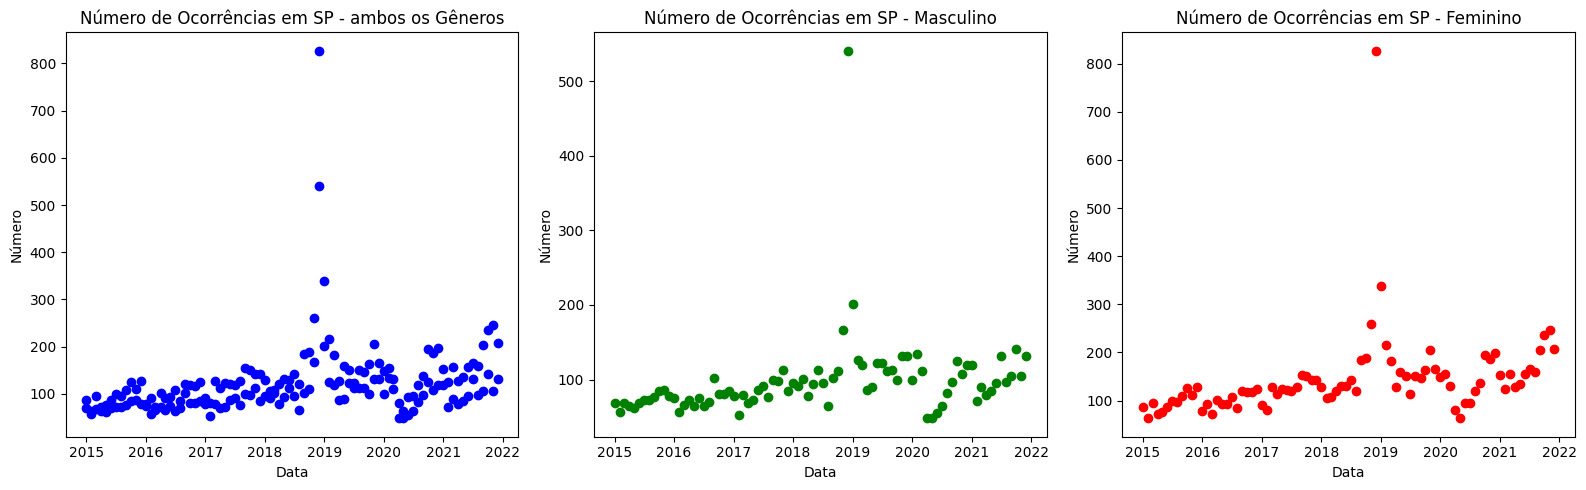

In [806]:
# Criar 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico para df_sp
ax[0].scatter(df_sp['data'], df_sp['numero'], color='blue')
ax[0].set_title('Número de Ocorrências em SP - ambos os Gêneros')
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Número')

# Gráfico para df_sp_masc
ax[1].scatter(df_sp_masc['data'], df_sp_masc['numero'], color='green')
ax[1].set_title('Número de Ocorrências em SP - Masculino')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Número')

# Gráfico para df_sp_fem
ax[2].scatter(df_sp_fem['data'], df_sp_fem['numero'], color='red')
ax[2].set_title('Número de Ocorrências em SP - Feminino')
ax[2].set_xlabel('Data')
ax[2].set_ylabel('Número')

plt.tight_layout()
plt.show()

##### Próximo passo é fazer uma regressão linear para os 3 cohorts acima (Estado de SP - por ambos os gêneros juntos, separado masculino e separado feminino).
##### Como o cliente solicitou a previsão do número total de casamentos homoafetivos, podemos fazer a análise somente do cohort de SP e para ambos os gêneros.
##### Irei fazer a previsão mais completa do Estado de SP - considerando os 3 cohorts e para MG e RJ farei considerando somente o ambos os gêneros, pois o cliente quer o número total de casamentos.
##### Neste caso de SP podemos ver se há uma diferença entre os números de casamentos previstos quando consideramos os 3 cohorts, neste caso podemos fazer a previsão para a seguinte situação:
##### **1) Estado de SP - Para ambos os gêneros**
##### **2) Estado de SP - Para o gênero Masculino**
##### **3) Estado de SP - Para o gênero Feminino**
##### Assim podemos constatar se o número de previsões no cohort **1)** é semelhante ao número de previsões na soma dos cohorts **2)** e **3)**.

##### Antes de fazermos a **Regressão Linear** devemos retirar os Outliers, porém irei fazer a **Regressão Linear** sem tirar os Outliers (DataFrame de SP).
##### A ideia é ver se há diferenças significativas no R² da Regressão Linear do modelo com e sem Outliers (posso adiantar de antemão que há diferenças).

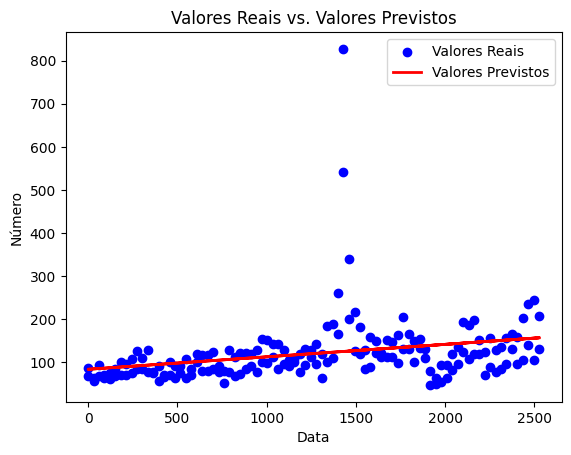

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     13.63
Date:                Thu, 23 May 2024   Prob (F-statistic):           0.000302
Time:                        23:45:43   Log-Likelihood:                -962.50
No. Observations:                 168   AIC:                             1929.
Df Residuals:                     166   BIC:                             1935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            84.2473     11.451      7.357

In [807]:
# Regressão Linear para o DataFrame de SP (df_sp) - Sem retirar Outliers (Mudança drástica no R² - reparar mais abaixo a diferença):
x = df_sp['data_numerica'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp['data_numerica'], df_sp['numero'], label='Valores Reais', color='blue')
plt.plot(df_sp['data_numerica'], y_pred, label='Valores Previstos', color='red', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número')
plt.title('Valores Reais vs. Valores Previstos')
plt.legend()
plt.show()

print(modelo.summary())

##### Agora o próximo passo é remover os Ouliers com o método de Tukey
##### Fonte: https://medium.com/@lucapqg/como-detectar-e-tratar-outliers-com-python-ca2cf088c160

##### Retirada dos Outliers para DataFrame do Estado de SP e Ambos os Gêneros (abaixo):

In [808]:
#Retirar os Outliers com o Método de Tukey - Retirar Outliers para df_sp:

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_sp['numero'].quantile(0.25)
Q3 = df_sp['numero'].quantile(0.75)

# Calcular IQR (Interquartile Range)
IQR = Q3 - Q1

# Definir os limites inferior e superior
inferior = Q1 - (1.5 * IQR)
superior = Q3 + (1.5 * IQR)
outliers = df_sp[(df_sp['numero'] < inferior) | (df_sp['numero'] > superior)] # Tira os dados que são menores que os limites inferiores OU maiores que os superiores

#Remoção dos Outliers
df_sp = df_sp[~((df_sp['numero'] < inferior) | (df_sp['numero'] > superior))]

##### Regressão Linear para SP - Ambos os Gêneros

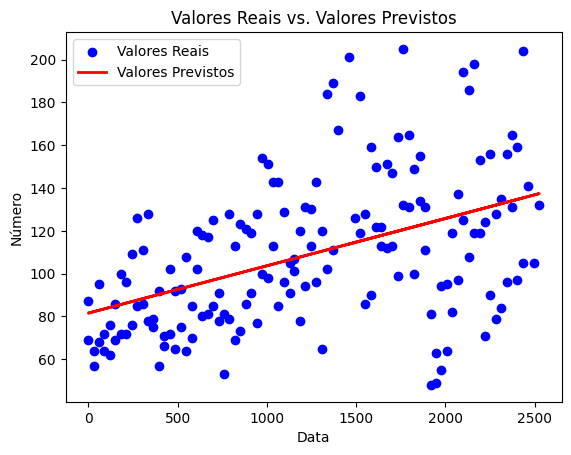

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     43.22
Date:                Thu, 23 May 2024   Prob (F-statistic):           6.78e-10
Time:                        23:45:43   Log-Likelihood:                -777.03
No. Observations:                 160   AIC:                             1558.
Df Residuals:                     158   BIC:                             1564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            81.5538      4.831     16.880

In [809]:
# Regressão Linear para o DataFrame de SP (df_sp) com Outliers removidos:
x = df_sp['data_numerica'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp['data_numerica'], df_sp['numero'], label='Valores Reais', color='blue')
plt.plot(df_sp['data_numerica'], y_pred, label='Valores Previstos', color='red', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número')
plt.title('Valores Reais vs. Valores Previstos')
plt.legend()
plt.show()

print(modelo.summary())

#Obter os coeficientes
intercept, slope = modelo.params

#Printar a equação da reta
print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

##### Podemos notar acima que há uma diferença significativa entre os R² nos modelos com e sem Outliers:
##### R² sem Outlier = 0.076
##### R² com Outlier = 0.215
##### Isso demonstra que não utilizar os Outliers no modelos de Regressão Linear, nos garante uma assertividade melhor do ajuste da reta.
##### Acima temos um print da equação que descreve a reta que melhor austa nos dados, isso será importante para prever o número de casamentos nos próximos 2 anos.
##### Neste caso a Eq. da Reta é:  $y = 81.55 + 0.02x$

##### Abaixo seguem as Regressões Lineares do Estado de SP - Para casamentos Masculinos e Femininos

##### Retirada dos Outliers para DataFrame do Estado de SP e Gênero Masculino (abaixo):

In [810]:
#Retirar os Outliers com o Método de Tukey - Retirar Outliers para df_sp_masc - DataFrame para SP - Masculino:

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_sp_masc['numero'].quantile(0.25)
Q3 = df_sp_masc['numero'].quantile(0.75)

# Calcular IQR (Interquartile Range)
IQR = Q3 - Q1

# Definir os limites inferior e superior
inferior = Q1 - (1.5 * IQR)
superior = Q3 + (1.5 * IQR)
outliers = df_sp_masc[(df_sp_masc['numero'] < inferior) | (df_sp_masc['numero'] > superior)] # Tira os dados que são menores que os limites inferiores OU maiores que os superiores

#Remoção dos Outliers
df_sp_masc = df_sp_masc[~((df_sp_masc['numero'] < inferior) | (df_sp_masc['numero'] > superior))]

##### Regressão Linear para SP - Masculino

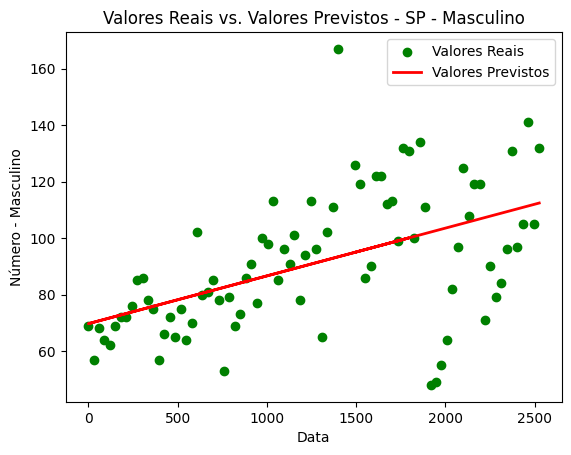

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     30.26
Date:                Thu, 23 May 2024   Prob (F-statistic):           4.40e-07
Time:                        23:45:43   Log-Likelihood:                -364.16
No. Observations:                  82   AIC:                             732.3
Df Residuals:                      80   BIC:                             737.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            69.6908      4.499     15.490

In [811]:
# Regressão Linear para o DataFrame de SP - Masculino:
# Devemos Criar a coluna de data númerica de dias corridos para este DataFrame, pois ainda não possui:
df_sp_masc['data_numerica'] = (df_sp_masc['data'] - pd.Timestamp(min(df_sp_masc['data']))).dt.days

x = df_sp_masc['data_numerica'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp_masc['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp_masc['data_numerica'], df_sp_masc['numero'], label='Valores Reais', color='green')
plt.plot(df_sp_masc['data_numerica'], y_pred, label='Valores Previstos', color='red', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número - Masculino')
plt.title('Valores Reais vs. Valores Previstos - SP - Masculino')
plt.legend()
plt.show()

print(modelo.summary())

# Obter os coeficientes
intercept, slope = modelo.params

# Imprimir a equação da reta
print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

##### Retirada dos Outliers para DataFrame do Estado de SP e Gênero Feminino (abaixo):

In [812]:
#Retirar os Outliers com o Método de Tukey - Retirar Outliers para df_sp_fem - DataFrame para SP - Feminino:

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_sp_fem['numero'].quantile(0.25)
Q3 = df_sp_fem['numero'].quantile(0.75)

# Calcular IQR (Interquartile Range)
IQR = Q3 - Q1

# Definir os limites inferior e superior
inferior = Q1 - (1.5 * IQR)
superior = Q3 + (1.5 * IQR)
outliers = df_sp_fem[(df_sp_fem['numero'] < inferior) | (df_sp_fem['numero'] > superior)] # Tira os dados que são menores que os limites inferiores OU maiores que os superiores

#Remoção dos Outliers
df_sp_fem = df_sp_fem[~((df_sp_fem['numero'] < inferior) | (df_sp_fem['numero'] > superior))]

##### Regressão Linear para SP - Feminino

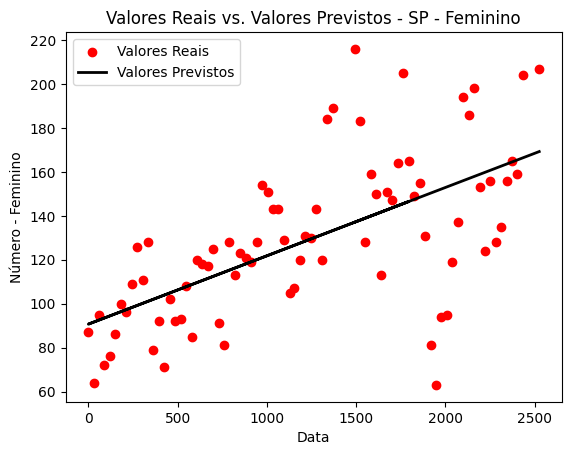

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     50.15
Date:                Thu, 23 May 2024   Prob (F-statistic):           5.82e-10
Time:                        23:45:44   Log-Likelihood:                -376.21
No. Observations:                  79   AIC:                             756.4
Df Residuals:                      77   BIC:                             761.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            90.6736      6.276     14.447

In [813]:
# Regressão Linear para o DataFrame de SP - Feminino:
# Devemos Criar a coluna de data númerica de dias corridos para este DataFrame, pois ainda não possui:
df_sp_fem['data_numerica'] = (df_sp_fem['data'] - pd.Timestamp(min(df_sp_fem['data']))).dt.days

x = df_sp_fem['data_numerica'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp_fem['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp_fem['data_numerica'], df_sp_fem['numero'], label='Valores Reais', color='red')
plt.plot(df_sp_fem['data_numerica'], y_pred, label='Valores Previstos', color='black', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número - Feminino')
plt.title('Valores Reais vs. Valores Previstos - SP - Feminino')
plt.legend()
plt.show()

print(modelo.summary())

# Obter os coeficientes
intercept, slope = modelo.params

# Imprimir a equação da reta
print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

##### Uma vez feita a regressão linear, temos que observar a assertividade do modelo.
##### Para vermos isto, devemos separar os dados entre treino (dados a serem treinados pelo modelo) e teste (dados reais para validarmos o modelo com base na regressão linear feita em cima dos dados 'treino').
##### Podemos separar os dados no share que desejarmos: no presente modelo, irei separar ente 70/30 (70% são dados de treino e 30% são dados de teste).
##### Vou fazer isso nos 3 DataFrames de SP (ambos os gêneros, feminino e masculino).
##### Verificarei também se a asserividade das 3 regressões lineares feitas (do Estado de SP) possuem uma boa asserividade e se as assserividades são semelhantes entre os 3 DataFrames.
##### O modelo será treinado em cima dos dados sem Outliers - Informação importante, pois não se garante uma boa assertividade considerando Outliers.

Erro Quadrático Médio (MSE): 682.6491587193535
Coeficiente de Determinação (R²): 0.20726491777191236


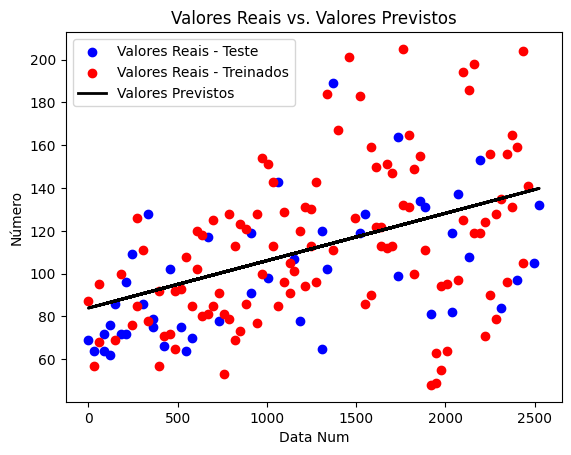

Equação da reta: y = 83.90 + 0.02 * x


In [814]:
# Dividir os dados em conjuntos de treino e teste - 70% treino e 30% teste
dados_treino, dados_teste = train_test_split(df_sp, test_size=0.3, random_state=42) # Aqui o slipt é feito de forma aleatória em cima de 30% da base de dados

x_treino = dados_treino['data_numerica']
y_treino = dados_treino['numero']
x_treino = sm.add_constant(x_treino)  # Adicionar constante aos dados de treino

modelo = sm.OLS(y_treino, x_treino).fit()

# Fazer previsões nos dados de teste
x_teste = dados_teste['data_numerica']
y_teste = dados_teste['numero']
x_teste = sm.add_constant(x_teste)  # Adicionar constante aos dados de teste
y_predicao = modelo.predict(x_teste)

# Avaliar o modelo
mse = mean_squared_error(y_teste, y_predicao)
r2 = r2_score(y_teste, y_predicao)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Plotar os valores reais vs. valores previstos
plt.scatter(dados_teste['data_numerica'], y_teste, label='Valores Reais - Teste', color='blue')
plt.scatter(dados_treino['data_numerica'], y_treino, label='Valores Reais - Treinados', color='red')
plt.plot(dados_teste['data_numerica'], y_predicao, label='Valores Previstos', color='black', linewidth=2)
plt.xlabel('Data Num')
plt.ylabel('Número')
plt.title('Valores Reais vs. Valores Previstos')
plt.legend()
plt.show()

# Obter os coeficientes
intercept, slope = modelo.params
print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

##### Equação da reta - SP - Ambos os Gêneros:   $y = 83.90 + 0.02x$

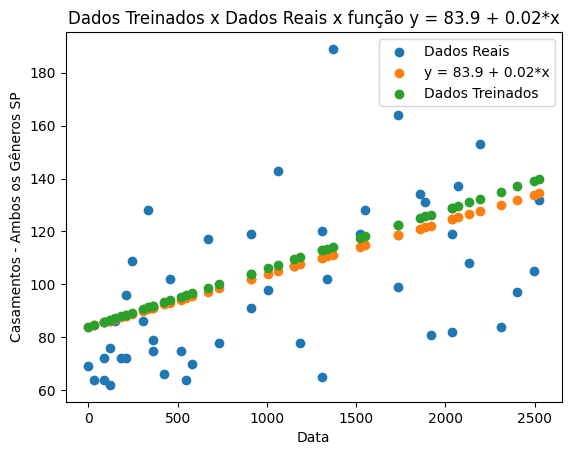

In [815]:
dados_teste['predição'] = y_predicao #Valores dos dados Treinados
#Criação de uma coluna para aplicar a função de output y = 83.9 + 0.02*x - Usei o conceito de lambda function para aplicar a função y(x) dentro dos dados:
dados_teste['função_y'] = dados_teste['data_numerica'].apply(lambda x: x*0.02 + 83.90)

plt.scatter(dados_teste['data_numerica'], dados_teste['numero'], label ='Dados Reais')
plt.scatter(dados_teste['data_numerica'], dados_teste['função_y'], label ='y = 83.9 + 0.02*x')
plt.scatter(dados_teste['data_numerica'], dados_teste['predição'], label ='Dados Treinados')
plt.title('Dados Treinados x Dados Reais x função y = 83.9 + 0.02*x')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Casamentos - Ambos os Gêneros SP')
plt.show()



In [816]:
#Criar uma coluna de % de Erro entre dados Treinados x Dados Reais, para observar a assertividade do modelo perante ao range de dados do histórico:
dados_teste['%'] = dados_teste['função_y']/dados_teste['numero'] - 1
dados_teste.reset_index()
dados_teste

,ano,uf,genero,mes,numero,data,regiao,data_numerica,predição,função_y,%
3144,2016,São Paulo,Feminino,Janeiro,79,2016-01-01,Sudeste,365,91.985021,91.20,0.154430
3147,2016,São Paulo,Feminino,Abril,102,2016-04-01,Sudeste,456,94.000317,93.02,-0.088039
4118,2020,São Paulo,Feminino,Março,131,2020-03-01,Sudeste,1886,125.669241,121.62,-0.071603
1531,2018,São Paulo,Masculino,Agosto,65,2018-08-01,Sudeste,1308,112.868795,110.06,0.693231
2821,2015,São Paulo,Feminino,Fevereiro,64,2015-02-01,Sudeste,31,84.588224,84.52,0.320625
881,2016,São Paulo,Masculino,Junho,75,2016-06-01,Sudeste,517,95.351229,94.24,0.256533
2828,2015,São Paulo,Feminino,Setembro,109,2015-09-01,Sudeste,243,89.283197,88.76,-0.185688
1527,2018,São Paulo,Masculino,Abril,78,2018-04-01,Sudeste,1186,110.166971,107.62,0.379744
2827,2015,São Paulo,Feminino,Agosto,96,2015-08-01,Sudeste,212,88.596668,88.14,-0.081875
4119,2020,São Paulo,Feminino,Abril,81,2020-04-01,Sudeste,1917,126.355771,122.24,0.509136


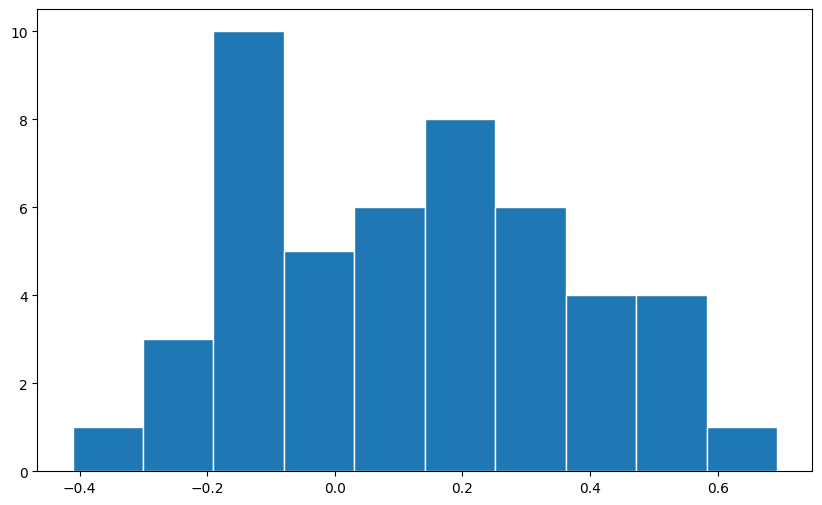

Média dos Erros em % do Modelo x Dados Reais:
0.11797279042615617
Desvio Padrão dos Erros em % do Modelo x Dados Reais:
0.2509133583818248


In [817]:
#Montar um histograma dos Erros para ver o range de confiabilidade dos dados, ou seja, qual é o range de erros que mais aparece:
plt.figure(figsize=(10, 6))
plt.hist(dados_teste['%'], bins=10, edgecolor='white')
plt.show()
print('Média dos Erros em % do Modelo x Dados Reais:')
print(dados_teste['%'].mean())
print('Desvio Padrão dos Erros em % do Modelo x Dados Reais:')
print(dados_teste['%'].std())

##### Com o gráfico (histograma) acima, podemos notar que os erros em % estão distribuidos em maior quantidade nos valores de -0.2 e 0.2 (ou seja, erros em um range de mais ou menos 20%).
##### Sendo assim podemos usar o valor médio dos erros para aferir ranges seguros onde existe maior probabilidade dos dados estarem contidos quando aplicamos em um range de anos futuros, por exemplo.

##### Vamos agora tentar prever o número de casamentos ao longo dos 2 próximos (de SP para ambos os gêneros) anos com base em tudo já feito até aqui.

In [818]:
#Criar um DataFrame de dados do 'Futuro', onde há somente novas datas dos próximos 2 anos e também valores do número de casamento com base na função linear:
data_numero = {'data': []} #Criar um dicionário com as datas dos próximos 2 anos (2022 e 2023 - variação por mês)
for j in range(2):
    for i in range(12):
        if i < 9:
            data_numero['data'].append(f'202{j+2}-0{i+1}-01')
        else:
            data_numero['data'].append(f'202{j+2}-{i+1}-01')


print(data_numero)
df_novo_sp = pd.DataFrame(data_numero)

{'data': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']}


In [819]:
#Continuação da criação do novo DataFrame de SP para Ambos os Gêneros de Dados Futuros (somente previsão)
df_novo_sp['data'] = pd.to_datetime(df_novo_sp['data'])
df_novo_sp['data_numerica'] = (df_novo_sp['data'] - df_sp['data'].min()).dt.days
df_novo_sp['ano'] = df_novo_sp['data'].dt.year
df_novo_sp['mes'] = df_novo_sp['data'].dt.month
df_novo_sp['uf'] = ['São Paulo']*len(df_novo_sp['data'])
df_novo_sp['genero'] = ['Ambos']*len(df_novo_sp['data'])
df_novo_sp['regiao'] = ['Sudeste']*len(df_novo_sp['data'])
df_novo_sp['numero'] = [np.nan]*len(df_novo_sp['data']) #Não há dados reais, portanto acrescentei NaN nesta coluna
df_novo_sp['função_y'] = df_novo_sp['data_numerica'].apply(lambda x: 83.9 + 0.02*x) #Dados previstos
df_novo_sp['previsão_otimista'] = df_novo_sp['data_numerica'].apply(lambda x: (83.9 + 0.02*x)/0.8) #Dados previstos - Otimista: Baseado nos dados do histograma -20% por isso dividi a função por 0.8
df_novo_sp['previsão_pessimista'] = df_novo_sp['data_numerica'].apply(lambda x: (83.9 + 0.02*x)/1.2) #Dados previstos - Pessimista: Baseado nos dados do histograma +20% por isso dividi a função por 1.2

In [820]:
df_novo_sp

,data,data_numerica,ano,mes,uf,genero,regiao,numero,função_y,previsão_otimista,previsão_pessimista
0,2022-01-01,2557,2022,1,São Paulo,Ambos,Sudeste,NaN,135.04,168.800,112.533333
1,2022-02-01,2588,2022,2,São Paulo,Ambos,Sudeste,NaN,135.66,169.575,113.050000
2,2022-03-01,2616,2022,3,São Paulo,Ambos,Sudeste,NaN,136.22,170.275,113.516667
3,2022-04-01,2647,2022,4,São Paulo,Ambos,Sudeste,NaN,136.84,171.050,114.033333
4,2022-05-01,2677,2022,5,São Paulo,Ambos,Sudeste,NaN,137.44,171.800,114.533333
5,2022-06-01,2708,2022,6,São Paulo,Ambos,Sudeste,NaN,138.06,172.575,115.050000
6,2022-07-01,2738,2022,7,São Paulo,Ambos,Sudeste,NaN,138.66,173.325,115.550000
7,2022-08-01,2769,2022,8,São Paulo,Ambos,Sudeste,NaN,139.28,174.100,116.066667
8,2022-09-01,2800,2022,9,São Paulo,Ambos,Sudeste,NaN,139.90,174.875,116.583333
9,2022-10-01,2830,2022,10,São Paulo,Ambos,Sudeste,NaN,140.50,175.625,117.083333


In [821]:
df_sp['função_y'] = df_sp['data_numerica'].apply(lambda x: 83.9 + 0.02*x)
df_sp

C:\Users\User\AppData\Local\Temp\ipykernel_3892\3280055285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['função_y'] = df_sp['data_numerica'].apply(lambda x: 83.9 + 0.02*x)


,ano,uf,genero,mes,numero,data,regiao,data_numerica,função_y
228,2019,São Paulo,Masculino,Janeiro,201,2019-01-01,Sudeste,1461,113.12
229,2019,São Paulo,Masculino,Fevereiro,126,2019-02-01,Sudeste,1492,113.74
230,2019,São Paulo,Masculino,Março,119,2019-03-01,Sudeste,1520,114.30
231,2019,São Paulo,Masculino,Abril,86,2019-04-01,Sudeste,1551,114.92
232,2019,São Paulo,Masculino,Maio,90,2019-05-01,Sudeste,1581,115.52
...,...,...,...,...,...,...,...,...,...
4444,2021,São Paulo,Feminino,Maio,135,2021-05-01,Sudeste,2312,130.14
4445,2021,São Paulo,Feminino,Junho,156,2021-06-01,Sudeste,2343,130.76
4446,2021,São Paulo,Feminino,Julho,165,2021-07-01,Sudeste,2373,131.36
4447,2021,São Paulo,Feminino,Agosto,159,2021-08-01,Sudeste,2404,131.98


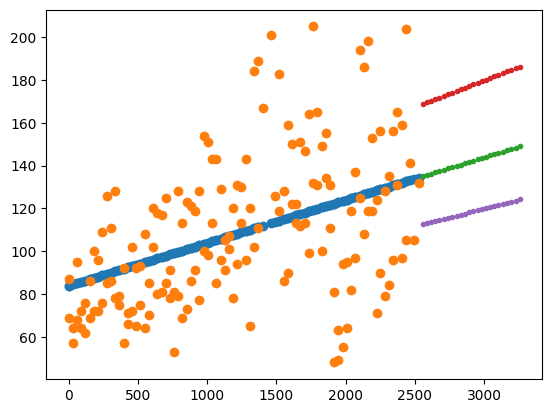

In [822]:
#Gráfico Final
plt.scatter(df_sp['data_numerica'], df_sp['função_y'])
plt.scatter(df_sp['data_numerica'], df_sp['numero'])
plt.scatter(df_novo_sp['data_numerica'], df_novo_sp['função_y'], marker='.')
plt.scatter(df_novo_sp['data_numerica'], df_novo_sp['previsão_otimista'], marker='.')
plt.scatter(df_novo_sp['data_numerica'], df_novo_sp['previsão_pessimista'], marker='.')

In [823]:
#Soma do número de casamentos em 2020 e 2021 - SP Ambos os Gêneros
print(df_sp[df_sp['ano'] == '2020']['numero'].sum() + df_sp[df_sp['ano'] == '2021']['numero'].sum())

5324


In [824]:
print((df_novo_sp[df_novo_sp['ano'] == 2022]['previsão_otimista'].sum() + df_novo_sp[df_novo_sp['ano'] == 2023]['previsão_otimista'].sum())*2) #Fator de 2 pois, considero Ambos os gêneros
print((df_novo_sp[df_novo_sp['ano'] == 2022]['função_y'].sum() + df_novo_sp[df_novo_sp['ano'] == 2023]['função_y'].sum())*2)
print((df_novo_sp[df_novo_sp['ano'] == 2022]['previsão_pessimista'].sum() + df_novo_sp[df_novo_sp['ano'] == 2023]['previsão_pessimista'].sum())*2)

8521.2
6816.960000000001
5680.8


##### Achei para Ambos os Gêneros de SP - FIM desta parte!

In [825]:
df_sp_fem

,ano,uf,genero,mes,numero,data,regiao,data_numerica
2497,2019,São Paulo,Feminino,Fevereiro,216,2019-02-01,Sudeste,1492
2498,2019,São Paulo,Feminino,Março,183,2019-03-01,Sudeste,1520
2499,2019,São Paulo,Feminino,Abril,128,2019-04-01,Sudeste,1551
2500,2019,São Paulo,Feminino,Maio,159,2019-05-01,Sudeste,1581
2501,2019,São Paulo,Feminino,Junho,150,2019-06-01,Sudeste,1612
...,...,...,...,...,...,...,...,...
4445,2021,São Paulo,Feminino,Junho,156,2021-06-01,Sudeste,2343
4446,2021,São Paulo,Feminino,Julho,165,2021-07-01,Sudeste,2373
4447,2021,São Paulo,Feminino,Agosto,159,2021-08-01,Sudeste,2404
4448,2021,São Paulo,Feminino,Setembro,204,2021-09-01,Sudeste,2435


In [826]:
df_novo_sp_fem = pd.DataFrame(data_numero)
#Criação do novo DataFrame de SP para o Gênero Feminio de Dados Futuros (somente previsão)
df_novo_sp_fem['data'] = pd.to_datetime(df_novo_sp_fem['data'])
df_novo_sp_fem['data_numerica'] = (df_novo_sp_fem['data'] - df_sp['data'].min()).dt.days
df_novo_sp_fem['ano'] = df_novo_sp_fem['data'].dt.year
df_novo_sp_fem['mes'] = df_novo_sp_fem['data'].dt.month
df_novo_sp_fem['uf'] = ['São Paulo']*len(df_novo_sp_fem['data'])
df_novo_sp_fem['genero'] = ['Femino']*len(df_novo_sp_fem['data'])
df_novo_sp_fem['regiao'] = ['Sudeste']*len(df_novo_sp_fem['data'])
df_novo_sp_fem['numero'] = [np.nan]*len(df_novo_sp_fem['data']) #Não há dados reais, portanto acrescentei NaN nesta coluna
df_novo_sp_fem['função_y'] = df_novo_sp_fem['data_numerica'].apply(lambda x: 90.67 + 0.03 * x) #Dados previstos
df_novo_sp_fem['previsão_otimista'] = df_novo_sp_fem['data_numerica'].apply(lambda x: (90.67 + 0.03 *x)/0.8) #Dados previstos - Otimista: Baseado nos dados do histograma -20% por isso dividi a função por 0.8
df_novo_sp_fem['previsão_pessimista'] = df_novo_sp_fem['data_numerica'].apply(lambda x: (90.67 + 0.03 * x)/1.2) #Dados previstos - Pessimista: Baseado nos dados do histograma +20% por isso dividi a função por 1.2

In [827]:
df_novo_sp_fem

,data,data_numerica,ano,mes,uf,genero,regiao,numero,função_y,previsão_otimista,previsão_pessimista
0,2022-01-01,2557,2022,1,São Paulo,Femino,Sudeste,NaN,167.38,209.2250,139.483333
1,2022-02-01,2588,2022,2,São Paulo,Femino,Sudeste,NaN,168.31,210.3875,140.258333
2,2022-03-01,2616,2022,3,São Paulo,Femino,Sudeste,NaN,169.15,211.4375,140.958333
3,2022-04-01,2647,2022,4,São Paulo,Femino,Sudeste,NaN,170.08,212.6000,141.733333
4,2022-05-01,2677,2022,5,São Paulo,Femino,Sudeste,NaN,170.98,213.7250,142.483333
5,2022-06-01,2708,2022,6,São Paulo,Femino,Sudeste,NaN,171.91,214.8875,143.258333
6,2022-07-01,2738,2022,7,São Paulo,Femino,Sudeste,NaN,172.81,216.0125,144.008333
7,2022-08-01,2769,2022,8,São Paulo,Femino,Sudeste,NaN,173.74,217.1750,144.783333
8,2022-09-01,2800,2022,9,São Paulo,Femino,Sudeste,NaN,174.67,218.3375,145.558333
9,2022-10-01,2830,2022,10,São Paulo,Femino,Sudeste,NaN,175.57,219.4625,146.308333


In [828]:
df_sp_fem['função_y'] = df_sp_fem['data_numerica'].apply(lambda x: 90.67 + 0.03 * x)
df_sp_fem

,ano,uf,genero,mes,numero,data,regiao,data_numerica,função_y
2497,2019,São Paulo,Feminino,Fevereiro,216,2019-02-01,Sudeste,1492,135.43
2498,2019,São Paulo,Feminino,Março,183,2019-03-01,Sudeste,1520,136.27
2499,2019,São Paulo,Feminino,Abril,128,2019-04-01,Sudeste,1551,137.20
2500,2019,São Paulo,Feminino,Maio,159,2019-05-01,Sudeste,1581,138.10
2501,2019,São Paulo,Feminino,Junho,150,2019-06-01,Sudeste,1612,139.03
...,...,...,...,...,...,...,...,...,...
4445,2021,São Paulo,Feminino,Junho,156,2021-06-01,Sudeste,2343,160.96
4446,2021,São Paulo,Feminino,Julho,165,2021-07-01,Sudeste,2373,161.86
4447,2021,São Paulo,Feminino,Agosto,159,2021-08-01,Sudeste,2404,162.79
4448,2021,São Paulo,Feminino,Setembro,204,2021-09-01,Sudeste,2435,163.72


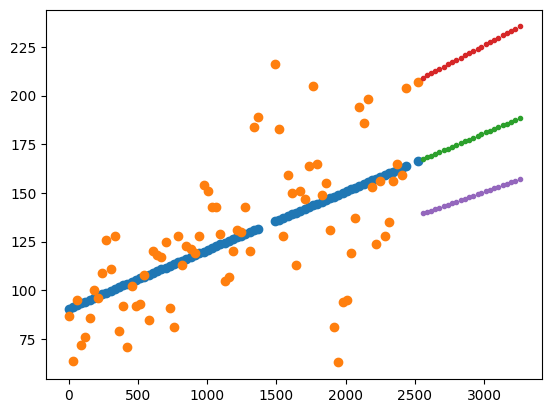

In [829]:
#Gráfico Final
plt.scatter(df_sp_fem['data_numerica'], df_sp_fem['função_y'])
plt.scatter(df_sp_fem['data_numerica'], df_sp_fem['numero'])
plt.scatter(df_novo_sp_fem['data_numerica'], df_novo_sp_fem['função_y'], marker='.')
plt.scatter(df_novo_sp_fem['data_numerica'], df_novo_sp_fem['previsão_otimista'], marker='.')
plt.scatter(df_novo_sp_fem['data_numerica'], df_novo_sp_fem['previsão_pessimista'], marker='.')

In [830]:
print(df_novo_sp_fem[df_novo_sp_fem['ano'] == 2022]['função_y'].sum())
print(df_sp_fem[df_sp_fem['ano'] == '2021']['numero'].sum())

2068.5
1587


In [831]:
print(df_novo_sp_fem[df_novo_sp_fem['ano'] == 2022]['previsão_otimista'].sum() + df_novo_sp_fem[df_novo_sp_fem['ano'] == 2023]['previsão_otimista'].sum())
print(df_novo_sp_fem[df_novo_sp_fem['ano'] == 2022]['função_y'].sum() + df_novo_sp_fem[df_novo_sp_fem['ano'] == 2023]['função_y'].sum())
print(df_novo_sp_fem[df_novo_sp_fem['ano'] == 2022]['previsão_pessimista'].sum() + df_novo_sp_fem[df_novo_sp_fem['ano'] == 2023]['previsão_pessimista'].sum())

5335.5
4268.4
3557.0


##### Feminino SP Finalizado, vamos fazer o Masculino:

In [832]:
df_sp_masc

,ano,uf,genero,mes,numero,data,regiao,data_numerica
229,2019,São Paulo,Masculino,Fevereiro,126,2019-02-01,Sudeste,1492
230,2019,São Paulo,Masculino,Março,119,2019-03-01,Sudeste,1520
231,2019,São Paulo,Masculino,Abril,86,2019-04-01,Sudeste,1551
232,2019,São Paulo,Masculino,Maio,90,2019-05-01,Sudeste,1581
233,2019,São Paulo,Masculino,Junho,122,2019-06-01,Sudeste,1612
...,...,...,...,...,...,...,...,...
2179,2021,São Paulo,Masculino,Agosto,97,2021-08-01,Sudeste,2404
2180,2021,São Paulo,Masculino,Setembro,105,2021-09-01,Sudeste,2435
2181,2021,São Paulo,Masculino,Outubro,141,2021-10-01,Sudeste,2465
2182,2021,São Paulo,Masculino,Novembro,105,2021-11-01,Sudeste,2496


In [833]:
df_novo_sp_masc = pd.DataFrame(data_numero)
#Criação do novo DataFrame de SP para o Gênero Feminio de Dados Futuros (somente previsão)
df_novo_sp_masc['data'] = pd.to_datetime(df_novo_sp_masc['data'])
df_novo_sp_masc['data_numerica'] = (df_novo_sp_masc['data'] - df_sp['data'].min()).dt.days
df_novo_sp_masc['ano'] = df_novo_sp_masc['data'].dt.year
df_novo_sp_masc['mes'] = df_novo_sp_masc['data'].dt.month
df_novo_sp_masc['uf'] = ['São Paulo']*len(df_novo_sp_masc['data'])
df_novo_sp_masc['genero'] = ['Masculino']*len(df_novo_sp_masc['data'])
df_novo_sp_masc['regiao'] = ['Sudeste']*len(df_novo_sp_masc['data'])
df_novo_sp_masc['numero'] = [np.nan]*len(df_novo_sp_masc['data']) #Não há dados reais, portanto acrescentei NaN nesta coluna
df_novo_sp_masc['função_y'] = df_novo_sp_masc['data_numerica'].apply(lambda x: 69.69 + 0.02 * x) #Dados previstos
df_novo_sp_masc['previsão_otimista'] = df_novo_sp_masc['data_numerica'].apply(lambda x: (69.69 + 0.02 * x)/0.8) #Dados previstos - Otimista: Baseado nos dados do histograma -20% por isso dividi a função por 0.8
df_novo_sp_masc['previsão_pessimista'] = df_novo_sp_masc['data_numerica'].apply(lambda x: (69.69 + 0.02 * x)/1.2) #Dados previstos - Pessimista: Baseado nos dados do histograma +20% por isso dividi a função por 1.2

In [834]:
df_sp_masc['função_y'] = df_sp_masc['data_numerica'].apply(lambda x: 69.69 + 0.02 * x)
df_novo_sp_masc

,data,data_numerica,ano,mes,uf,genero,regiao,numero,função_y,previsão_otimista,previsão_pessimista
0,2022-01-01,2557,2022,1,São Paulo,Masculino,Sudeste,NaN,120.83,151.0375,100.691667
1,2022-02-01,2588,2022,2,São Paulo,Masculino,Sudeste,NaN,121.45,151.8125,101.208333
2,2022-03-01,2616,2022,3,São Paulo,Masculino,Sudeste,NaN,122.01,152.5125,101.675000
3,2022-04-01,2647,2022,4,São Paulo,Masculino,Sudeste,NaN,122.63,153.2875,102.191667
4,2022-05-01,2677,2022,5,São Paulo,Masculino,Sudeste,NaN,123.23,154.0375,102.691667
5,2022-06-01,2708,2022,6,São Paulo,Masculino,Sudeste,NaN,123.85,154.8125,103.208333
6,2022-07-01,2738,2022,7,São Paulo,Masculino,Sudeste,NaN,124.45,155.5625,103.708333
7,2022-08-01,2769,2022,8,São Paulo,Masculino,Sudeste,NaN,125.07,156.3375,104.225000
8,2022-09-01,2800,2022,9,São Paulo,Masculino,Sudeste,NaN,125.69,157.1125,104.741667
9,2022-10-01,2830,2022,10,São Paulo,Masculino,Sudeste,NaN,126.29,157.8625,105.241667


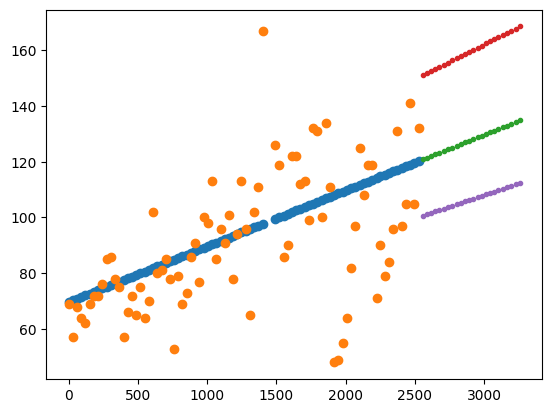

In [835]:
#Gráfico Final
plt.scatter(df_sp_masc['data_numerica'], df_sp_masc['função_y'])
plt.scatter(df_sp_masc['data_numerica'], df_sp_masc['numero'])
plt.scatter(df_novo_sp_masc['data_numerica'], df_novo_sp_masc['função_y'], marker='.')
plt.scatter(df_novo_sp_masc['data_numerica'], df_novo_sp_masc['previsão_otimista'], marker='.')
plt.scatter(df_novo_sp_masc['data_numerica'], df_novo_sp_masc['previsão_pessimista'], marker='.')

In [836]:
print(df_novo_sp_masc[df_novo_sp_masc['ano'] == 2022]['função_y'].sum())
print(df_sp_masc[df_sp_masc['ano'] == '2021']['numero'].sum())

1489.92
1250


In [837]:
print(df_novo_sp_masc[df_novo_sp_masc['ano'] == 2022]['previsão_otimista'].sum() + df_novo_sp_masc[df_novo_sp_masc['ano'] == 2023]['previsão_otimista'].sum())
print(df_novo_sp_masc[df_novo_sp_masc['ano'] == 2022]['função_y'].sum() + df_novo_sp_masc[df_novo_sp_masc['ano'] == 2023]['função_y'].sum())
print(df_novo_sp_masc[df_novo_sp_masc['ano'] == 2022]['previsão_pessimista'].sum() + df_novo_sp_masc[df_novo_sp_masc['ano'] == 2023]['previsão_pessimista'].sum())

3834.2999999999997
3067.44
2556.2


##### Finalizei Masculino, vamos a comparação entre Ambos e a soma dos Gêneros em SP:

In [838]:
print((df_novo_sp[df_novo_sp['ano'] == 2022]['função_y'].sum() + df_novo_sp[df_novo_sp['ano'] == 2023]['função_y'].sum())*2)
print(df_novo_sp_masc[df_novo_sp_masc['ano'] == 2022]['função_y'].sum() + df_novo_sp_masc[df_novo_sp_masc['ano'] == 2023]['função_y'].sum() + df_novo_sp_fem[df_novo_sp_fem['ano'] == 2022]['função_y'].sum() + df_novo_sp_fem[df_novo_sp_fem['ano'] == 2023]['função_y'].sum())

6816.960000000001
7335.84


In [841]:
6816.96/7335.84 -1

-0.07073218608911869

##### Foi demonstrado acima que podemos fazer a previsão para ambos os sexos e multiplicar por 2 no final, no caso não precisaríamos fazer cohort por gênero e depois somar os resultados, pois a soma final tem uma diferença de 7% (entre fazer a regressão linear para os dois gêneros (juntos) e multiplicar por 2 ou fazer a regressão linear para os gêneros de forma separada e depois somar os resultados).

#### **Funções pertinentes:**

##### Como vamos fazer muitas operações de retirar outliers, podemos criar uma função de remoção dos mesmos:

In [839]:
def remover_outliers(data_frame):

    # Calcular Q1 (25º percentil) e Q3 (75º percentil)
    Q1 = data_frame['numero'].quantile(0.25)
    Q3 = data_frame['numero'].quantile(0.75)

    # Calcular IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Definir os limites inferior e superior
    inferior = Q1 - (1.5 * IQR)
    superior = Q3 + (1.5 * IQR)
    outliers = data_frame[(data_frame['numero'] < inferior) | (data_frame['numero'] > superior)] # Tira os dados que são menores que os limites inferiores OU maiores que os superiores

    #Remoção dos Outliers
    df_auxiliar = data_frame[~((data_frame['numero'] < inferior) | (data_frame['numero'] > superior))]

    return df_auxiliar #Retorna o DataFrame sem outliers e sem modificar o original como eu estava fazendo logo acima na seção de Outliers.

##### Como vamos fazer várias regressões lineares (MG e RJ serão os próximos estados), podemos criar uma função de regressão linear também, isso garantiria uma otimização do tempo.
##### Essa otimização do tempo seria com base nas 3 regressões lineares feitas em SP, dito isto é mais vantajoso criarmos uma função e aplicar em MG e RJ.

In [857]:
def funcao_regressao(data_frame):
    # Regressão Linear para o DataFrame (data_frame) com Outliers removidos:
    x = data_frame['data_numerica'] 
    y = data_frame['numero']

    x = sm.add_constant(x)
    modelo = sm.OLS(y, x).fit()
    y_predicao = modelo.predict()

    plt.scatter(data_frame['data_numerica'], data_frame['numero'], label='Valores Reais', color='blue')
    plt.plot(data_frame['data_numerica'], y_predicao, label='Valores Previstos', color='red', linewidth=2)

    plt.xlabel('Data')
    plt.ylabel('Número')
    plt.title('Valores Reais vs. Valores Previstos')
    plt.legend()
    plt.show()

    print(modelo.summary())

    #Obter os coeficientes
    intercept, slope = modelo.params

    #Printar a equação da reta
    print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

    #Devolve o data_frame com uma coluna de predição:
    data_frame['predição'] = y_predicao
    data_auxiliar = data_frame
    return data_auxiliar

##### Função para separar dados em treino e teste e ver assertividade do modelo:

In [872]:
def teste_treino(data_frame):
    # Dividir os dados em conjuntos de treino e teste - 70% treino e 30% teste
    dados_treino, dados_teste = train_test_split(data_frame, test_size=0.3, random_state=42) # Aqui o slipt é feito de forma aleatória em cima de 30% da base de dados

    x_treino = dados_treino['data_numerica']
    y_treino = dados_treino['numero']
    x_treino = sm.add_constant(x_treino)  # Adicionar constante aos dados de treino

    modelo = sm.OLS(y_treino, x_treino).fit()

    # Fazer previsões nos dados de teste
    x_teste = dados_teste['data_numerica']
    y_teste = dados_teste['numero']
    x_teste = sm.add_constant(x_teste)  # Adicionar constante aos dados de teste
    y_predicao = modelo.predict(x_teste)

    # Avaliar o modelo
    mse = mean_squared_error(y_teste, y_predicao)
    r2 = r2_score(y_teste, y_predicao)

    print(f"Erro Quadrático Médio (MSE): {mse}")
    print(f"Coeficiente de Determinação (R²): {r2}")

    # Plotar os valores reais vs. valores previstos
    plt.scatter(dados_teste['data_numerica'], y_teste, label='Valores Reais - Teste', color='blue')
    plt.scatter(dados_treino['data_numerica'], y_treino, label='Valores Reais - Treinados', color='red')
    plt.plot(dados_teste['data_numerica'], y_predicao, label='Valores Previstos', color='black', linewidth=2)
    plt.xlabel('Data Num')
    plt.ylabel('Número')
    plt.title('Valores Reais vs. Valores Previstos')
    plt.legend()
    plt.show()

    # Obter os coeficientes
    intercept, slope = modelo.params
    print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

    dados_teste['predição'] = y_predicao #Valores dos dados Treinados
    dados_teste['função_y'] = dados_teste['data_numerica'].apply(lambda x: x*slope + intercept)

    plt.scatter(dados_teste['data_numerica'], dados_teste['numero'], label ='Dados Reais')
    plt.scatter(dados_teste['data_numerica'], dados_teste['função_y'], label =f'y ={intercept}  + {slope}*x')
    plt.title(f'Dados Treinados x Dados Reais')
    plt.legend()
    plt.xlabel('Data')
    plt.ylabel('Casamentos - Ambos os Gêneros SP')
    plt.show()

    #Criar uma coluna de % de Erro entre dados Treinados x Dados Reais, para observar a assertividade do modelo perante ao range de dados do histórico:
    dados_teste['%'] = dados_teste['função_y']/dados_teste['numero'] - 1
    dados_teste.reset_index()
    dados_teste
    return dados_teste

#### **Análise para MG:**

In [858]:
# Aqui irei criar um DataFrame somente para MG:
df_mg = df[df['uf'] == 'Minas Gerais']
df_mg

,ano,uf,genero,mes,numero,data,regiao,data_numerica
192,2019,Minas Gerais,Masculino,Janeiro,48,2019-01-01,Sudeste,1461
193,2019,Minas Gerais,Masculino,Fevereiro,32,2019-02-01,Sudeste,1492
194,2019,Minas Gerais,Masculino,Março,23,2019-03-01,Sudeste,1520
195,2019,Minas Gerais,Masculino,Abril,30,2019-04-01,Sudeste,1551
196,2019,Minas Gerais,Masculino,Maio,26,2019-05-01,Sudeste,1581
...,...,...,...,...,...,...,...,...
4411,2021,Minas Gerais,Feminino,Agosto,41,2021-08-01,Sudeste,2404
4412,2021,Minas Gerais,Feminino,Setembro,48,2021-09-01,Sudeste,2435
4413,2021,Minas Gerais,Feminino,Outubro,61,2021-10-01,Sudeste,2465
4414,2021,Minas Gerais,Feminino,Novembro,49,2021-11-01,Sudeste,2496


In [859]:
df_mg = remover_outliers(df_mg)
df_mg

,ano,uf,genero,mes,numero,data,regiao,data_numerica
192,2019,Minas Gerais,Masculino,Janeiro,48,2019-01-01,Sudeste,1461
193,2019,Minas Gerais,Masculino,Fevereiro,32,2019-02-01,Sudeste,1492
194,2019,Minas Gerais,Masculino,Março,23,2019-03-01,Sudeste,1520
195,2019,Minas Gerais,Masculino,Abril,30,2019-04-01,Sudeste,1551
196,2019,Minas Gerais,Masculino,Maio,26,2019-05-01,Sudeste,1581
...,...,...,...,...,...,...,...,...
4409,2021,Minas Gerais,Feminino,Junho,36,2021-06-01,Sudeste,2343
4410,2021,Minas Gerais,Feminino,Julho,48,2021-07-01,Sudeste,2373
4411,2021,Minas Gerais,Feminino,Agosto,41,2021-08-01,Sudeste,2404
4412,2021,Minas Gerais,Feminino,Setembro,48,2021-09-01,Sudeste,2435


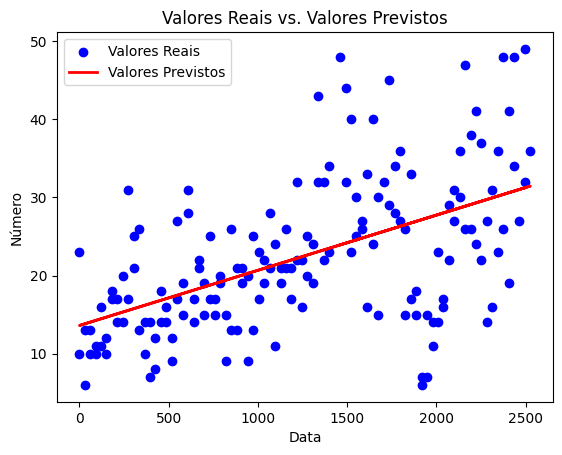

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     64.29
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.13e-13
Time:                        10:19:48   Log-Likelihood:                -571.09
No. Observations:                 162   AIC:                             1146.
Df Residuals:                     160   BIC:                             1152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.6088      1.272     10.699

C:\Users\User\AppData\Local\Temp\ipykernel_3892\4091420822.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['predição'] = y_predicao


In [860]:
df_mg_regressao = funcao_regressao(df_mg)

In [866]:
df_mg_regressao

,ano,uf,genero,mes,numero,data,regiao,data_numerica,predição
192,2019,Minas Gerais,Masculino,Janeiro,48,2019-01-01,Sudeste,1461,23.927883
193,2019,Minas Gerais,Masculino,Fevereiro,32,2019-02-01,Sudeste,1492,24.146837
194,2019,Minas Gerais,Masculino,Março,23,2019-03-01,Sudeste,1520,24.344602
195,2019,Minas Gerais,Masculino,Abril,30,2019-04-01,Sudeste,1551,24.563556
196,2019,Minas Gerais,Masculino,Maio,26,2019-05-01,Sudeste,1581,24.775448
...,...,...,...,...,...,...,...,...,...
4409,2021,Minas Gerais,Feminino,Junho,36,2021-06-01,Sudeste,2343,30.157483
4410,2021,Minas Gerais,Feminino,Julho,48,2021-07-01,Sudeste,2373,30.369374
4411,2021,Minas Gerais,Feminino,Agosto,41,2021-08-01,Sudeste,2404,30.588328
4412,2021,Minas Gerais,Feminino,Setembro,48,2021-09-01,Sudeste,2435,30.807283


Erro Quadrático Médio (MSE): 74.59996122242524
Coeficiente de Determinação (R²): 0.3081924587303482


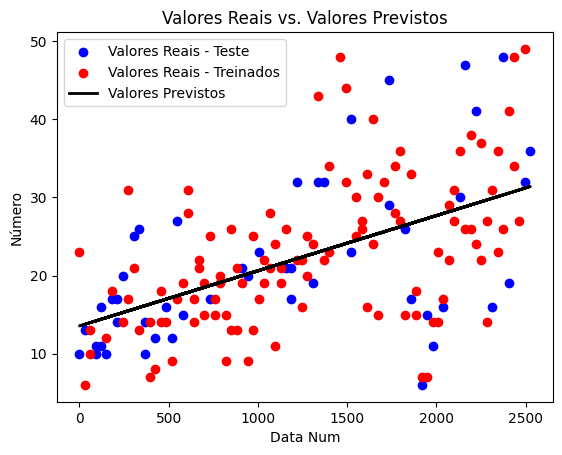

Equação da reta: y = 13.55 + 0.01 * x


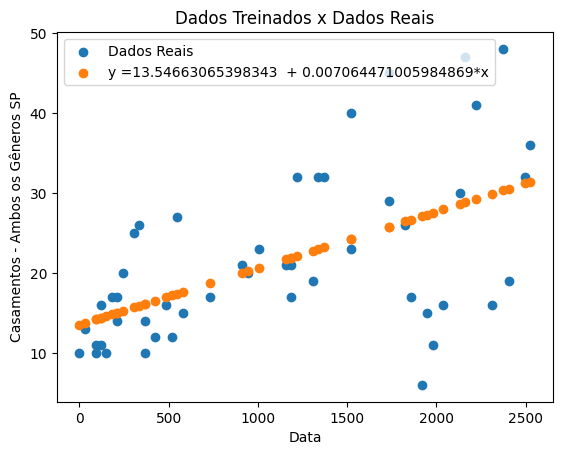

,ano,uf,genero,mes,numero,data,regiao,data_numerica,predição,função_y,%
4410,2021,Minas Gerais,Feminino,Julho,48,2021-07-01,Sudeste,2373,30.310620,30.310620,-0.368529
3112,2016,Minas Gerais,Feminino,Maio,16,2016-05-01,Sudeste,486,16.979964,16.979964,0.061248
3758,2018,Minas Gerais,Feminino,Março,21,2018-03-01,Sudeste,1155,21.706095,21.706095,0.033624
1495,2018,Minas Gerais,Masculino,Agosto,19,2018-08-01,Sudeste,1308,22.786959,22.786959,0.199314
2785,2015,Minas Gerais,Feminino,Fevereiro,13,2015-02-01,Sudeste,31,13.765629,13.765629,0.058895
845,2016,Minas Gerais,Masculino,Junho,12,2016-06-01,Sudeste,517,17.198962,17.198962,0.433247
2792,2015,Minas Gerais,Feminino,Setembro,20,2015-09-01,Sudeste,243,15.263297,15.263297,-0.236835
1491,2018,Minas Gerais,Masculino,Abril,17,2018-04-01,Sudeste,1186,21.925093,21.925093,0.289711
2791,2015,Minas Gerais,Feminino,Agosto,17,2015-08-01,Sudeste,212,15.044299,15.044299,-0.115041
4084,2020,Minas Gerais,Feminino,Maio,15,2020-05-01,Sudeste,1947,27.301156,27.301156,0.820077


In [875]:
df_mg_var = teste_treino(df_mg)
df_mg_var

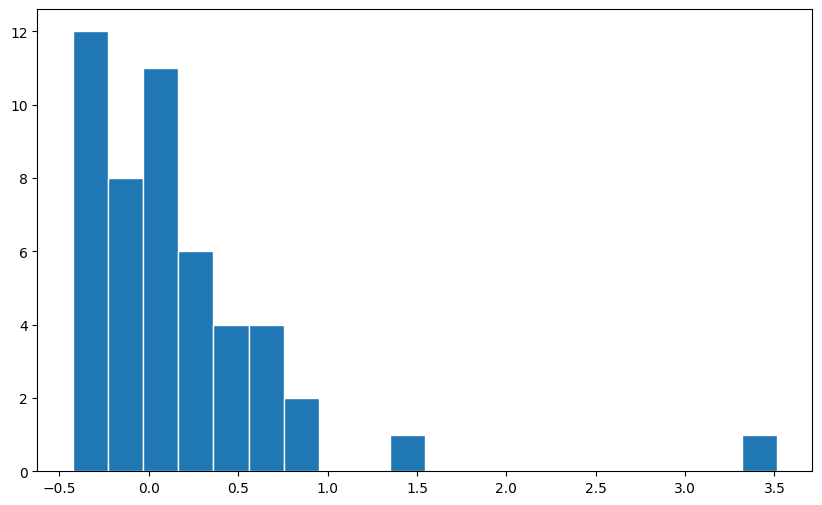

Média dos Erros em % do Modelo x Dados Reais:
0.16884729318976552
Desvio Padrão dos Erros em % do Modelo x Dados Reais:
0.6291892272605275


In [881]:
#Montar um histograma dos Erros para ver o range de confiabilidade dos dados, ou seja, qual é o range de erros que mais aparece:
plt.figure(figsize=(10, 6))
plt.hist(df_mg_var['%'], bins=20, edgecolor='white')
plt.show()
print('Média dos Erros em % do Modelo x Dados Reais:')
print(df_mg_var['%'].mean())
print('Desvio Padrão dos Erros em % do Modelo x Dados Reais:')
print(df_mg_var['%'].std())

In [882]:
#Criar um DataFrame de dados do 'Futuro', onde há somente novas datas dos próximos 2 anos e também valores do número de casamento com base na função linear:
data_numero = {'data': []} #Criar um dicionário com as datas dos próximos 2 anos (2022 e 2023 - variação por mês)
for j in range(2):
    for i in range(12):
        if i < 9:
            data_numero['data'].append(f'202{j+2}-0{i+1}-01')
        else:
            data_numero['data'].append(f'202{j+2}-{i+1}-01')


print(data_numero)
df_novo_mg = pd.DataFrame(data_numero)

#Criação do novo DataFrame de SP para o Gênero Feminio de Dados Futuros (somente previsão)
df_novo_mg['data'] = pd.to_datetime(df_novo_mg['data'])
df_novo_mg['data_numerica'] = (df_novo_mg['data'] - df_mg['data'].min()).dt.days
df_novo_mg['ano'] =df_novo_mg['data'].dt.year
df_novo_mg['mes'] = df_novo_mg['data'].dt.month
df_novo_mg['uf'] = ['São Paulo']*len(df_novo_mg['data'])
df_novo_mg['genero'] = ['Masculino']*len(df_novo_mg['data'])
df_novo_mg['regiao'] = ['Sudeste']*len(df_novo_mg['data'])
df_novo_mg['numero'] = [np.nan]*len(df_novo_mg['data']) #Não há dados reais, portanto acrescentei NaN nesta coluna
df_novo_mg['função_y'] = df_novo_mg['data_numerica'].apply(lambda x: 13.55 + 0.01 * x) #Dados previstos
df_novo_mg['previsão_otimista'] = df_novo_mg['data_numerica'].apply(lambda x: (13.55 + 0.01 * x)/(1-0.16)) #Dados previstos - Otimista: Baseado nos dados do histograma -16%
df_novo_mg['previsão_pessimista'] = df_novo_mg['data_numerica'].apply(lambda x: (13.55 + 0.01 * x)/1.16) #Dados previstos - Pessimista: Baseado nos dados do histograma +16%

{'data': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']}


In [883]:
df_novo_mg

,data,data_numerica,ano,mes,uf,genero,regiao,numero,função_y,previsão_otimista,previsão_pessimista
0,2022-01-01,2557,2022,1,São Paulo,Masculino,Sudeste,NaN,39.12,46.571429,33.724138
1,2022-02-01,2588,2022,2,São Paulo,Masculino,Sudeste,NaN,39.43,46.940476,33.991379
2,2022-03-01,2616,2022,3,São Paulo,Masculino,Sudeste,NaN,39.71,47.273810,34.232759
3,2022-04-01,2647,2022,4,São Paulo,Masculino,Sudeste,NaN,40.02,47.642857,34.500000
4,2022-05-01,2677,2022,5,São Paulo,Masculino,Sudeste,NaN,40.32,48.000000,34.758621
5,2022-06-01,2708,2022,6,São Paulo,Masculino,Sudeste,NaN,40.63,48.369048,35.025862
6,2022-07-01,2738,2022,7,São Paulo,Masculino,Sudeste,NaN,40.93,48.726190,35.284483
7,2022-08-01,2769,2022,8,São Paulo,Masculino,Sudeste,NaN,41.24,49.095238,35.551724
8,2022-09-01,2800,2022,9,São Paulo,Masculino,Sudeste,NaN,41.55,49.464286,35.818966
9,2022-10-01,2830,2022,10,São Paulo,Masculino,Sudeste,NaN,41.85,49.821429,36.077586


C:\Users\User\AppData\Local\Temp\ipykernel_3892\868455680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['função_y'] = df_mg['data_numerica'].apply(lambda x: 13.55 + 0.01 * x)


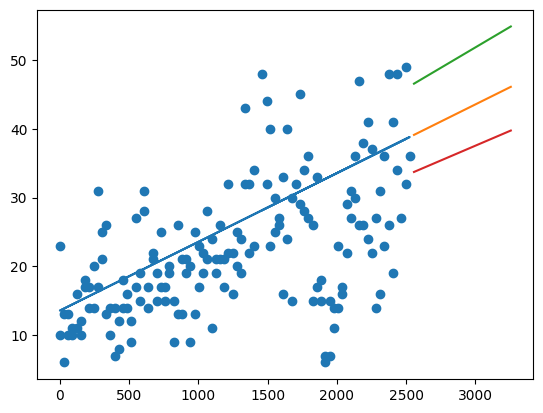

In [888]:
df_mg['função_y'] = df_mg['data_numerica'].apply(lambda x: 13.55 + 0.01 * x)
#Gráfico Final
plt.plot(df_mg['data_numerica'], df_mg['função_y'])
plt.scatter(df_mg['data_numerica'], df_mg['numero'])
plt.plot(df_novo_mg['data_numerica'], df_novo_mg['função_y'])
plt.plot(df_novo_mg['data_numerica'], df_novo_mg['previsão_otimista'])
plt.plot(df_novo_mg['data_numerica'], df_novo_mg['previsão_pessimista'])

## Separar os dados entre treinamento e dados reais (já com os Outliers removidos) e ver assertividade do modelo. (colocar range em % de acerto pros próximos anos 2022 e 2023).
## colocar os dados do futuro do modelo 2022 e 2023 em um DataFrame e plotar os resultados com base nos acertos acima (ver assertividade da previsão).
## Fazer os passos acima para cada estado. SP é para fazer por cohort de genêro e verificar se tem muita diferença se somar os gêneros (df com ambos os gêneros).